In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Reshape
from tensorflow.keras.regularizers import l1,l2

In [3]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [25]:
# loading data
path = 'C:/Users/lyc07/Desktop/Columbia/S3/GR5243 Applied Data Science/prj3/'
dat_full = pd.read_csv(path + 'dat_full.csv')
dat_full.drop('Unnamed: 0', inplace=True, axis=1)
dat_full.drop('Unnamed: 0.1', inplace=True, axis=1)

dat_full.head()

X, y = dat_full.iloc[:,:-1],dat_full.iloc[:,-1]
y = y-1

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature5998,feature5999,feature6000,feature6001,feature6002,feature6003,feature6004,feature6005,feature6006,emotion_idx
0,31,18,1,20,33,20,1,17,151,116,...,98,150,202,50,102,154,52,104,52,21
1,35,15,6,27,39,20,2,17,151,151,...,104,159,213,54,109,163,55,109,54,11
2,35,17,2,20,32,14,3,20,165,122,...,99,152,204,52,105,157,53,105,52,2
3,33,16,3,20,29,12,6,23,161,133,...,101,156,210,54,109,163,55,109,54,7
4,29,15,1,17,27,13,2,17,133,102,...,83,128,172,44,89,133,45,89,44,1


In [7]:
# Train test split on data
X_train, X_test, y_train, y_test = train_test_split(X, np.asarray(y), test_size=0.2, random_state=123)

In [16]:
# Applying pca to reduce dimensionality
# first apply pca on X_train, then project X_test to the same dimension
# we have 90 dimensions after applying pca to the data
pca = PCA(n_components=0.99, whiten=True)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
print(len(X_pca_train[1]))
print(len(X_pca_test[1]))

90
90


In [21]:
# plain model
#activity_regularizer=l2(0.001)
model = Sequential()
model.add(Dense(800, input_dim=90, activation='relu',activity_regularizer=l2(0.001)))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(22, activation = 'sigmoid'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_pca_train, y_train, epochs = 15,validation_split = 0.2)

history.history.keys()

pred = model.predict(X_pca_test)

pred_index = np.argmax(pred, axis = 1)
accuracy = accuracy_score(y_test, pred_index)
accuracy

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 800)               72800     
_________________________________________________________________
dense_22 (Dense)             (None, 600)               480600    
_________________________________________________________________
dense_23 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_24 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

0.43

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

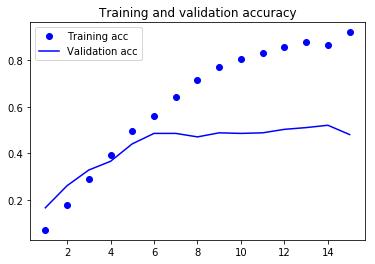

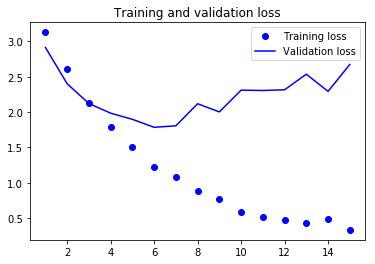

In [23]:
# epoch plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
# model 2 after parameter tuning
# for parameter tuning see neural net tuning.ipynb
# The parameters tuned are number of neurons in each layer; kernel_initializer; activation function; dropout_rate and optimizer.
# We can see the accuracy is increased
model2 = Sequential()
model2.add(Dense(1000, input_dim=90, activation='tanh',kernel_initializer = 'lecun_uniform',activity_regularizer=l1(0.001)))
model2.add(Dense(600, activation='tanh',kernel_initializer = 'lecun_uniform'))
model2.add(Dense(600, activation='tanh',kernel_initializer = 'lecun_uniform'))
model2.add(Dense(600, activation='tanh',kernel_initializer = 'lecun_uniform'))
model2.add(Dense(600, activation='tanh',kernel_initializer = 'lecun_uniform'))
model2.add(Dense(400, activation='tanh',kernel_initializer = 'lecun_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(22, activation = 'sigmoid'))

model2.summary()

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.fit(X_pca_train, y_train, epochs = 15, validation_split = 0.2)

pred2 = model2.predict(X_pca_test)
pred_index2 = np.argmax(pred2, axis = 1)
accuracy2 = accuracy_score(y_test, pred_index2)
accuracy2


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1000)              91000     
_________________________________________________________________
dense_29 (Dense)             (None, 600)               600600    
_________________________________________________________________
dense_30 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_31 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_32 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_33 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)              

0.472